In [2]:
# !pip install sklearn

  Using cached sklearn-0.0-py2.py3-none-any.whl
  Using cached scikit_learn-1.0-cp37-cp37m-win_amd64.whl (7.1 MB)


In [3]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
iris = datasets.load_iris()

In [6]:
labels=pd.DataFrame(iris.target)
labels.columns=['labels']

In [11]:
data=pd.DataFrame(iris.data)
data.columns=['Sepal length','Sepal width','Petal length','Petal width']


In [14]:
data=pd.concat([data, labels], axis=1)

In [63]:
feature=data[['Sepal length','Sepal width']]

In [ ]:
#1. 클러스터

In [17]:
from sklearn.cluster import KMeans
import seaborn as sns

In [18]:
model=KMeans(n_clusters=3)

In [19]:
model.fit(feature)

KMeans(n_clusters=3)

In [21]:
pred=pd.DataFrame(model.predict(feature))

In [22]:
pred.columns=['predict']

In [26]:
pred

res=pd.concat([feature, pred], axis=1)
res

,Sepal length,Sepal width,predict
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,1
146,6.3,2.5,2
147,6.5,3.0,1
148,6.2,3.4,1


In [27]:
model.cluster_centers_

array([[5.006     , 3.428     ],
       [6.81276596, 3.07446809],
       [5.77358491, 2.69245283]])

In [28]:
df=pd.DataFrame(model.cluster_centers_, columns=['Sepal length', 'Sepal width'])
df

,Sepal length,Sepal width
0,5.006000,3.428000
1,6.812766,3.074468
2,5.773585,2.692453


In [32]:
centerX=df['Sepal length']
centerY=df['Sepal width']

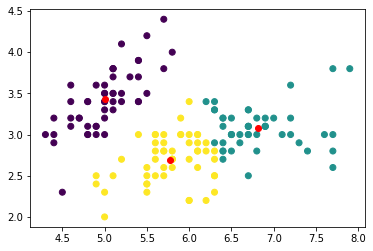

In [33]:
plt.scatter(res['Sepal length'], res['Sepal width'], c=res['predict'])
plt.scatter(centerX, centerY, c='r')

In [50]:
# 표준화 작업을 수행한 다음 KMeans 모델을 생성하고 prediction 수행하시오.
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

feature = ss.fit_transform(df)

model=KMeans(n_clusters=3)

model.fit(feature)

pred=pd.DataFrame(model.predict(feature))

pred.columns=['predict']

pred

res=pd.concat([pd.DataFrame(feature), pred], axis=1)
res



,0,1,predict
0,-1.159019,1.208634,0
1,1.281297,0.031610,1
2,-0.122278,-1.240244,2


In [55]:
# 파이프라인 : 여러 단계를 거쳐 데이터가 정제되고 학습되는 것
# 스케일러로 스케일링 -> 스케일링 결과 데이터를 kmeans 모델에 넣고 학습

In [57]:
from sklearn.pipeline import make_pipeline

In [59]:
scaler = StandardScaler()
model=KMeans(n_clusters=3)

In [60]:
pipeline = make_pipeline(scaler, model)

In [ ]:
feature=data[['Sepal length','Sepal width']]

In [64]:
pipeline.fit(feature)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=3))])

In [66]:
pred=pd.DataFrame(pipeline.predict(feature))
pred

,0
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,1
147,2
148,2


In [ ]:
# Inertia value : 클러스터링을 수행한 결과, 
# 각 클러스터의 중심점에서 데이터와의 거리를 합산한 값(클러스터의 응집력을 나타냄)
# 클러스터링이 잘 됐다는 것은 클러스터의 응집력이 높다(중심점과 데이터간의 거리가 작다)


In [72]:
kv=range(1,10)
inertias=[]
for k in kv:
    model=KMeans(n_clusters=k)
    model.fit(feature)
    inertias.append(model.inertia_)

C:\Users\poeun\anaconda3\envs\tf2.2\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "


Text(0, 0.5, 'inertia')

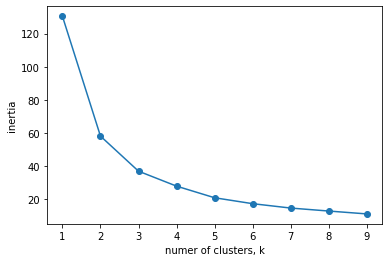

In [75]:
plt.plot(kv, inertias, '-o')
plt.xlabel('numer of clusters, k')
plt.ylabel('inertia')

In [77]:
pd.crosstab(data['labels'], pred[0])

,0,1,2
labels,,,
0,49,1,0
1,1,36,13
2,0,19,31


In [ ]:
#2. 계층적 클러스터(Hierachical Clustering) : 비슷한 것끼리 묶어가면서 
# 최종적으로는 하나의 클러스터가 될때까지 묶는 알고리즘

